<a href="https://colab.research.google.com/github/ankurkr0064/perceptron/blob/main/Image_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

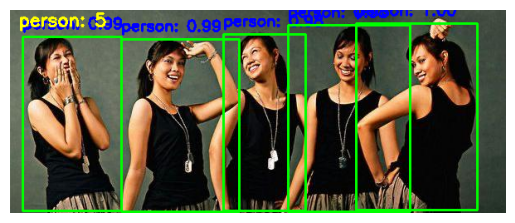

In [2]:
import torch
import torchvision
from torchvision.transforms import functional as F
import cv2
import numpy as np
import matplotlib.pyplot as plt

model = torchvision.models.detection.fasterrcnn_resnet50_fpn(weights="DEFAULT")
model.eval()

COCO_INSTANCE_CATEGORY_NAMES = [
    'background', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus',
    'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'N/A', 'stop sign',
    'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow',
    'elephant', 'bear', 'zebra', 'giraffe', 'N/A', 'backpack', 'umbrella', 'N/A', 'N/A',
    'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
    'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket',
    'bottle', 'N/A', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl',
    'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
    'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'N/A', 'dining table',
    'N/A', 'N/A', 'toilet', 'N/A', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone',
    'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'N/A', 'book',
    'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush'
]

def detect_objects(image_path, confidence_threshold=0.5):
    image = cv2.imread(image_path)
    if image is None:
        print(f"Error: Could not load image from '{image_path}'. Please check the file path and ensure the image exists.")
        return None

    original_image = image.copy()
    image_tensor = F.to_tensor(image).unsqueeze(0)

    with torch.no_grad():
        predictions = model(image_tensor)

    boxes = predictions[0]['boxes'].cpu().numpy()
    labels = predictions[0]['labels'].cpu().numpy()
    scores = predictions[0]['scores'].cpu().numpy()

    category_count = {}

    for i, box in enumerate(boxes):
        if scores[i] >= confidence_threshold:
            label = COCO_INSTANCE_CATEGORY_NAMES[labels[i]]
            score = scores[i]
            start_point = (int(box[0]), int(box[1]))
            end_point = (int(box[2]), int(box[3]))

            cv2.rectangle(original_image, start_point, end_point, (0, 255, 0), 2)

            cv2.putText(original_image, f"{label}: {score:.2f}", (start_point[0], start_point[1] - 10),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 0, 0), 2)

            if label in category_count:
                category_count[label] += 1
            else:
                category_count[label] = 1

    # Display counts at the top of the image
    y_offset = 20
    for category, count in category_count.items():
        text = f"{category}: {count}"
        cv2.putText(original_image, text, (10, y_offset), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 255), 2)
        y_offset += 25

    return original_image


if __name__ == "__main__":
    IMAGE_PATH = "/content/1000101414.jpg"

    detected_image = detect_objects(IMAGE_PATH)

    if detected_image is not None:
        detected_image_rgb = cv2.cvtColor(detected_image, cv2.COLOR_BGR2RGB)

        plt.imshow(detected_image_rgb)
        plt.axis('off')
        plt.show()